# Assignment 3: Classification and Feature Engineering


**Name**: Saurabh Kumar <br>
**Roll No**: 22B3905 <br>
**Video Link**: [Google Drive](https://drive.google.com/drive/folders/1LWe5lAKVdkq5RrFuUPwShpCxKsUquI-I?usp=share_link)


In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


## Exploratory Data Analyis

In [48]:
df = pd.read_csv('bank.csv')

In [49]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
df.corr(numeric_only=True)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [7]:
BOLD = "\033[1m"
RESET = "\033[0m"

# print unique values in each column if it is less than 15
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) < 13:
        print(f"Unique values in {BOLD}'{column}':{RESET} {unique_values}")

Unique values in 'job': ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Unique values in 'marital': ['married' 'single' 'divorced']
Unique values in 'education': ['secondary' 'tertiary' 'primary' 'unknown']
Unique values in 'default': ['no' 'yes']
Unique values in 'housing': ['yes' 'no']
Unique values in 'loan': ['no' 'yes']
Unique values in 'contact': ['unknown' 'cellular' 'telephone']
Unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in 'poutcome': ['unknown' 'other' 'failure' 'success']
Unique values in 'deposit': ['yes' 'no']


In [8]:
unknown_counts = (df == 'unknown').sum()
unknown_counts

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

## Observation
We note that there are 70 rows with an unknown `job` and 497 rows with an unknown `education`. Given that the number of rows with unknown `job` is relatively small, we can consider dropping this column. In contrast, we should retain the `education` column to analyze the trends associated with it. Additionally, the `contact` column appears unnecessary and can also be removed.

In [50]:
df = df.drop(columns=['contact'])

In [10]:
age_counts = df['age'].value_counts().sort_index()

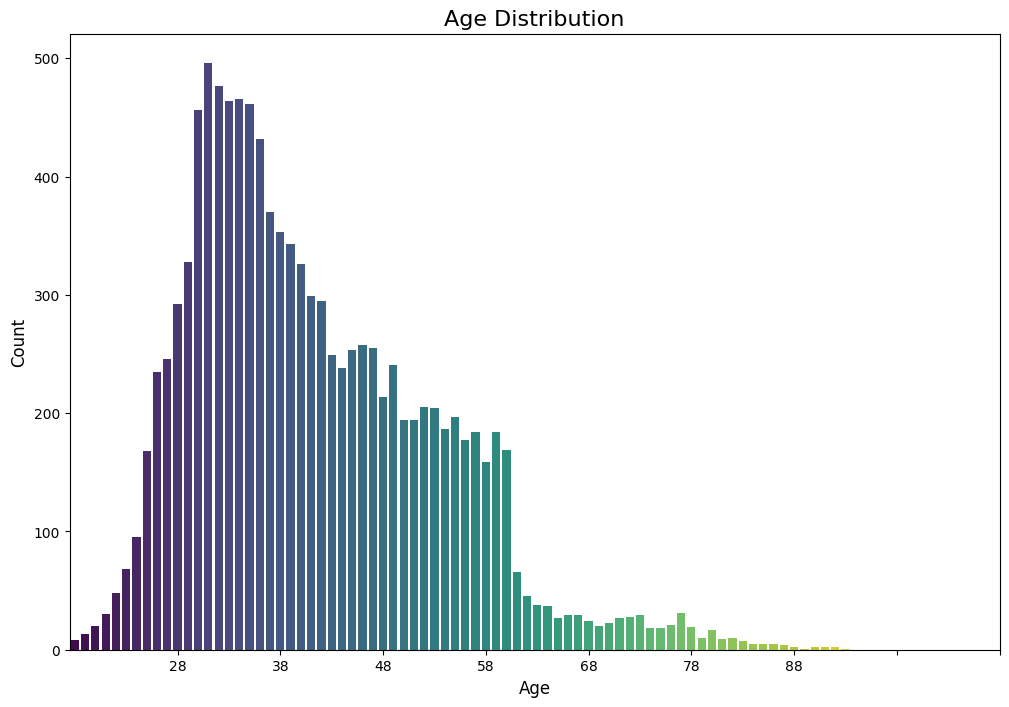

In [11]:
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=age_counts.index, y=age_counts.values,hue=age_counts.index, palette="viridis", legend=False)


# Adding titles and labels
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

#[..]
xticks = np.arange(10, age_counts.index.max() + 1, 10)  # Create ticks every 10 years
plt.xticks(xticks)  # Set the x-ticks to only show at 18, 28, 38, ...

# Display the plot
plt.show()

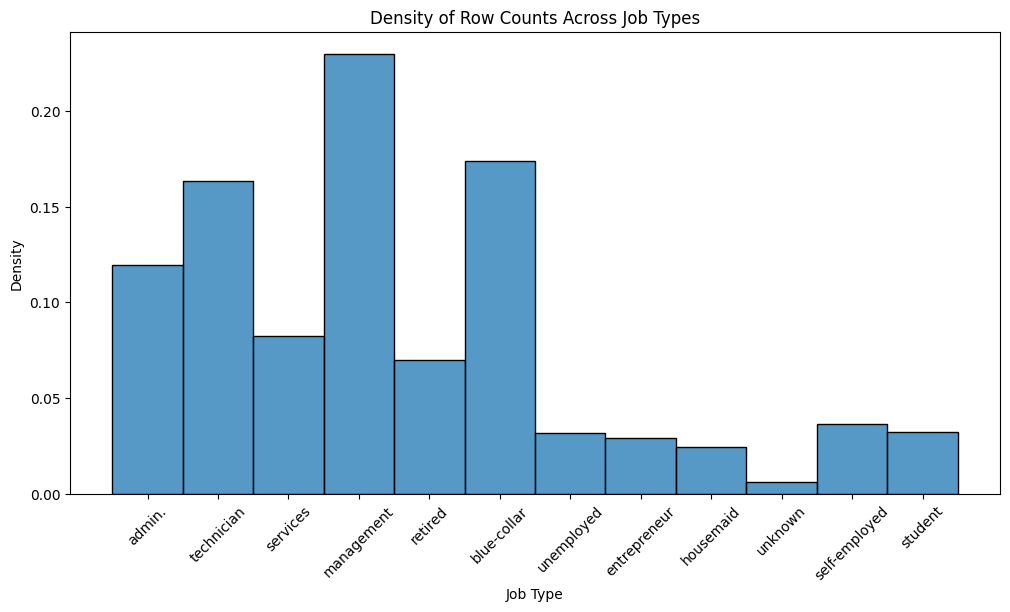

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [12]:
job_counts = df['job'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="job", stat="density")
plt.xticks(rotation=45)
plt.title("Density of Row Counts Across Job Types")
plt.xlabel("Job Type")
plt.ylabel("Density")
plt.show()
job_counts

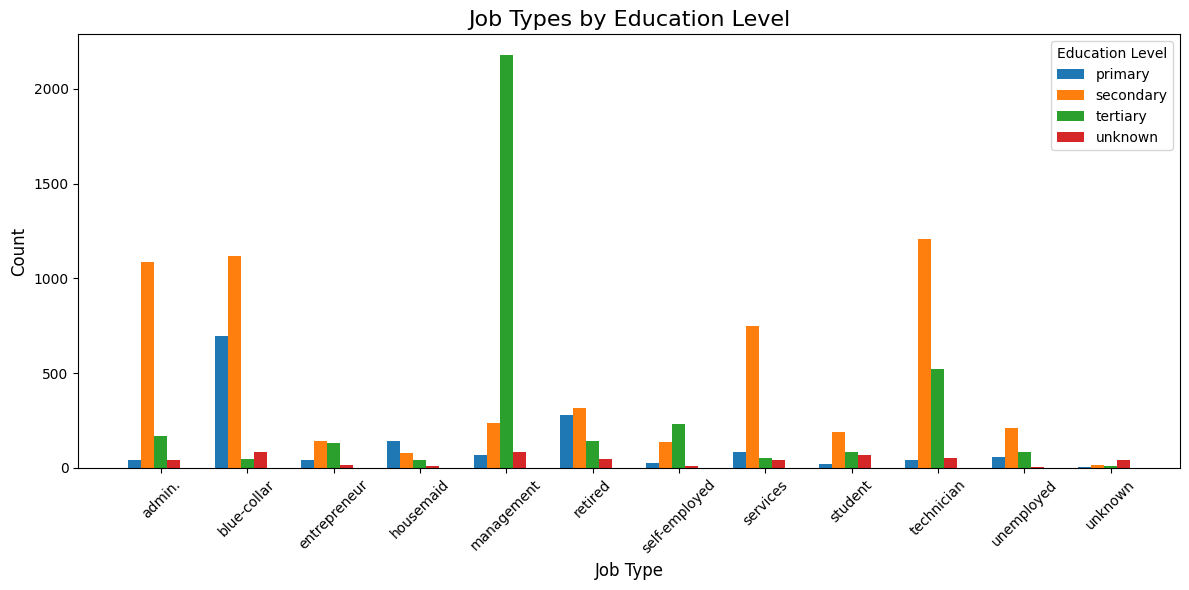

In [13]:
#Group by job and education level and count the occurrences
job_education_counts = df.groupby(['job', 'education']).size().unstack(fill_value=0)

# Prepare data for plotting
jobs = job_education_counts.index
education_levels = job_education_counts.columns

# Set width of the bars
width = 0.15
x = np.arange(len(jobs))

# Plotting the data using plt.bar
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar for each education level
for i, education in enumerate(education_levels):
    ax.bar(x + (i - len(education_levels) / 2) * width, job_education_counts[education], 
           width, label=education)

# Adding labels and titles
ax.set_xlabel('Job Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Job Types by Education Level', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(jobs, rotation=45)
ax.legend(title="Education Level")

# Show plot
plt.tight_layout()
plt.show()

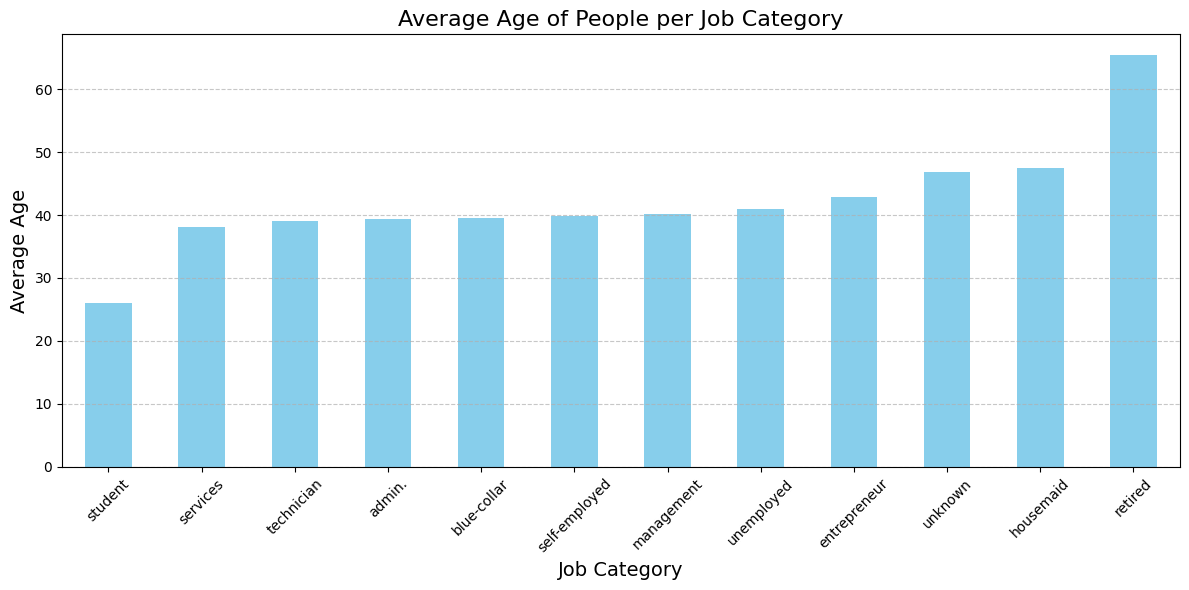

In [14]:
# Group by job and calculate the average age
average_age_per_job = df.groupby('job')['age'].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 6))
average_age_per_job.plot(kind='bar', color='skyblue')
plt.title('Average Age of People per Job Category', fontsize=16)
plt.xlabel('Job Category', fontsize=14)
plt.ylabel('Average Age', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

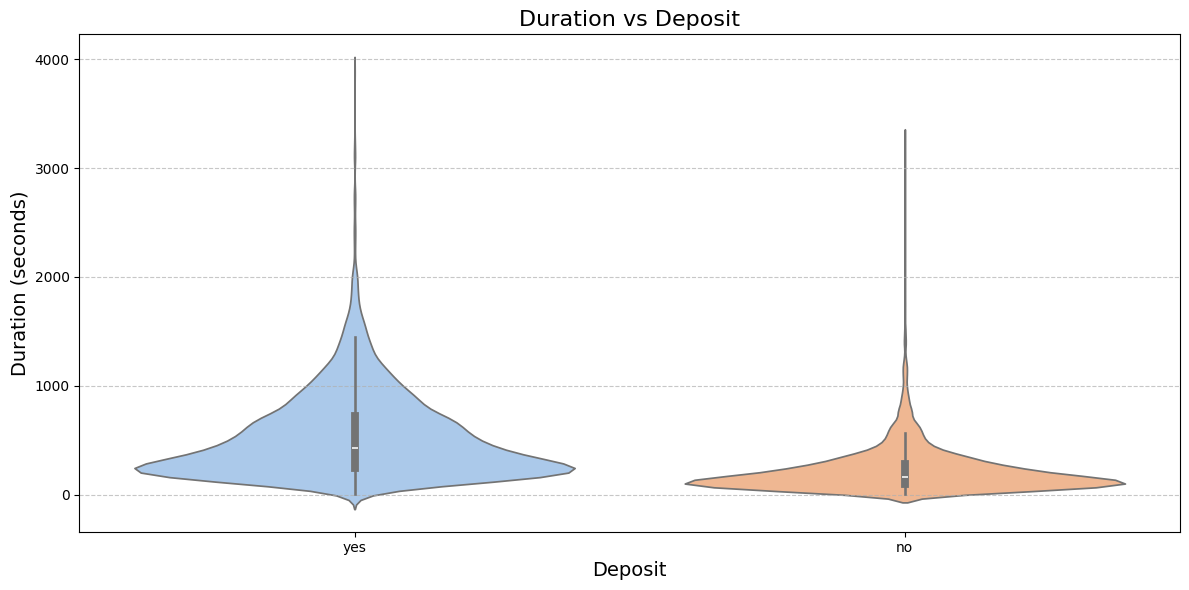

In [15]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='deposit', y='duration', data=df, hue='deposit', palette='pastel', legend=False)
plt.title('Duration vs Deposit', fontsize=16)
plt.xlabel('Deposit', fontsize=14)
plt.ylabel('Duration (seconds)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

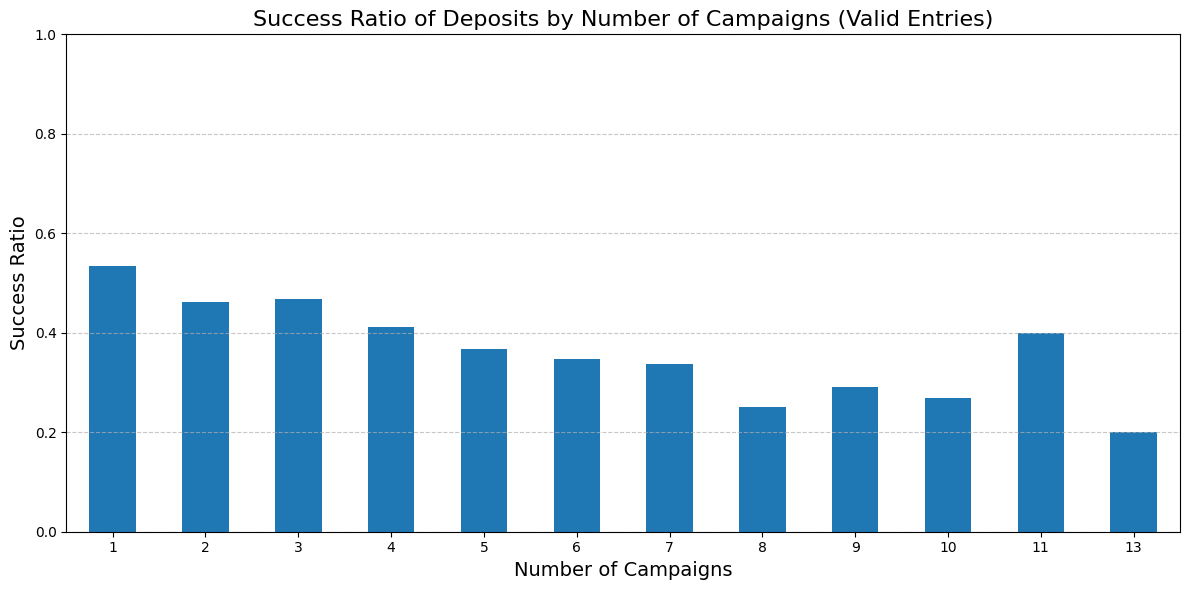

In [16]:
# Calculate total campaigns and successful deposits
campaign_summary = df.groupby('campaign')['deposit'].value_counts().unstack(fill_value=0)

# Add a total samples column
campaign_summary['total_samples'] = campaign_summary['yes'] + campaign_summary['no']

# Calculate the success ratio only for valid entries
campaign_summary['success_ratio'] = campaign_summary['yes'] / (campaign_summary['yes'] + campaign_summary['no'])

# Filter out campaigns with fewer than 10 samples
campaign_summary_filtered = campaign_summary[campaign_summary['total_samples'] >= 30]

# Plotting the success ratio for valid campaigns
plt.figure(figsize=(12, 6))
campaign_summary_filtered['success_ratio'].plot(kind='bar', color='#1f77b4')
plt.title('Success Ratio of Deposits by Number of Campaigns (Valid Entries)', fontsize=16)
plt.xlabel('Number of Campaigns', fontsize=14)
plt.ylabel('Success Ratio', fontsize=14)
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

deposit
no     5873
yes    5289
Name: count, dtype: int64


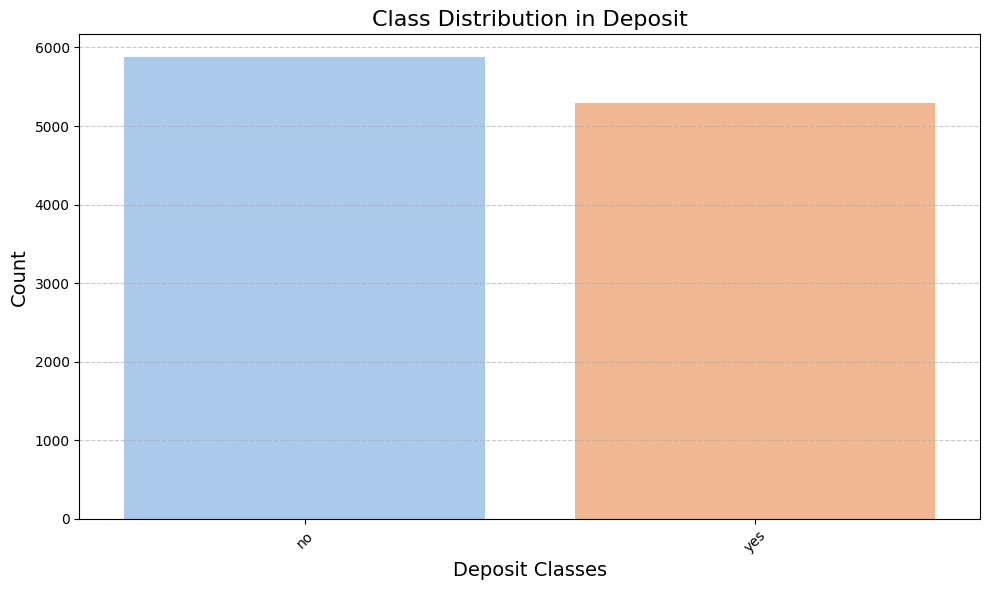

In [17]:
deposit_counts = df['deposit'].value_counts()

# Display the counts
print(deposit_counts)

# Plotting the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=deposit_counts.index, y=deposit_counts.values, hue=deposit_counts.index,  palette='pastel', legend=False)
plt.title('Class Distribution in Deposit', fontsize=16)
plt.xlabel('Deposit Classes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
deposit_percentage = (deposit_counts / deposit_counts.sum()) * 100
deposit_percentage

deposit
no     52.616019
yes    47.383981
Name: count, dtype: float64

### Observation
As we can see the classes have a difference if ~5% and hence we can consider them to be balanced.

## Selected Metrics

We choose the **F1 score** and **AUC** as metrics for this dataset because they are well-suited for slightly imbalanced data and provide insights into different aspects of model performance:

### F1 Score
The F1 score balances **precision** (how many of the positive predictions are correct) and **recall** (how many actual positives are correctly identified). This balance is important when both false positives and false negatives have consequences. In this dataset, predicting deposits accurately is likely significant for decision-making. The F1 score will help ensure that the model doesn’t overfit to one class and can effectively identify both "yes" and "no" outcomes.

### AUC (Area Under the ROC Curve)
The AUC metric indicates the model’s ability to distinguish between classes across different threshold settings. Since the dataset has a slight class imbalance, AUC is helpful because it shows how well the model can separate "yes" and "no" classes over a range of decision thresholds. This provides a comprehensive view of the model’s discriminatory power.



## Transforms on Continous Variables

To improve the model's performance and handle different scales of continuous variables, we apply normalization and standardization to selected variables. Here’s the approach for each variable:

1. **Age**: Standardized using z-score to scale the variable with mean 0 and standard deviation 1, making it easier to compare with other standardized features.
2. **Balance**: Standardized using z-score, as it contains both positive and negative values and has a large range.
3. **Campaign**: Log-transformed to reduce skewness, as it has high values that could disproportionately affect model learning.
4. **Pdays**: Standardized using z-score but only for values greater than -1 (indicating a previous contact); otherwise, the value remains unchanged. This approach minimizes the impact of "no previous contact" values.
5. **Previous**: Log-transformed to reduce skewness for values greater than 0 and then standardized. Log transformation helps to handle high skewness in the data.


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # [1] Standardization and Regularization
df[['age', 'balance']] = scaler.fit_transform(df[['age', 'balance']])

# Log transformation and standardization for campaign and previous
df['campaign'] = np.log1p(df['campaign'])
df['previous'] = np.log1p(df['previous'])

# Standardize the transformed campaign and previous columns
df[['campaign', 'previous']] = scaler.fit_transform(df[['campaign', 'previous']])

# For pdays: Standardize only values greater than -1
df['pdays'] = np.where(df['pdays'] > -1, scaler.fit_transform(df[['pdays']]), df['pdays'])


## Grouping Job Types for Simplification

To optimize the `job` variable in our dataset, we have grouped similar categories. 

1. **White-Collar Jobs**: The categories `management`, `technician`, `admin.`, and `self-employed` are generally skilled or office-based occupations. Grouping these under **"white-collar"** captures shared characteristics of individuals in these roles.

2. **Blue-Collar Jobs**: The `blue-collar` and `services` jobs involve manual or trade-related work, making them suitable for grouping under **"blue-collar"**.

3. **Not Working**: Categories such as `retired`, `unemployed`, and `housemaid` represent individuals who may not be engaged in traditional employment. Hence I group them under **"not working"**.

4. **Low-Frequency and Miscellaneous**: Less common categories like `entrepreneur` and `unknown` may not provide unique predictive information and are grouped under **"other"**.

5. **Student**: The `student` category remains unchanged, as students might exhibit distinct financial or behavioral characteristics.

### Grouping Summary

| Original Job Type | Grouped Category |
|-------------------|------------------|
| management        | white-collar     |
| technician        | white-collar     |
| admin.            | white-collar     |
| self-employed     | white-collar     |
| blue-collar       | blue-collar      |
| services          | blue-collar      |
| retired           | not working      |
| unemployed        | not working      |
| housemaid         | not working      |
| entrepreneur      | other            |
| student           | student (unchanged) |
| unknown           | other            |

By consolidating these job categories, I have reduce the original 12 job types to 5, simplifying the model while retaining meaningful distinctions among job types.

In [52]:
job_grouping = {
    'management': 'white-collar',
    'technician': 'white-collar',
    'admin.': 'white-collar',
    'self-employed': 'white-collar',
    'blue-collar': 'blue-collar',
    'services': 'blue-collar',
    'retired': 'not working',
    'unemployed': 'not working',
    'housemaid': 'not working',
    'entrepreneur': 'other',
    'student': 'student',
    'unknown': 'other'
}

#  Apply the job grouping
df['job_grouped'] = df['job'].map(job_grouping)

# [2] One-hot encode the 'job_grouped' column 
job_dummies = pd.get_dummies(df['job_grouped'], prefix='job', drop_first=True)
df = pd.concat([df, job_dummies], axis=1)

# One-hot encode other categorical columns
categorical_columns = ['marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'deposit']
for col in categorical_columns:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat([df, dummies], axis=1)

# Drop the original columns if they are no longer needed
df = df.drop(columns=['job', 'job_grouped', 'month'] + categorical_columns)


df.head()


,age,balance,day,duration,campaign,pdays,previous,job_not working,job_other,job_student,...,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,1.491505,0.252525,5,1042,-1.0,-1.0,-1.0,False,False,False,...,True,False,False,False,True,False,False,False,True,True
1,1.239676,-0.459974,5,1467,-1.0,-1.0,-1.0,False,False,False,...,True,False,False,False,False,False,False,False,True,True
2,-0.019470,-0.080160,5,1389,-1.0,-1.0,-1.0,False,False,False,...,True,False,False,False,True,False,False,False,True,True
3,1.155733,0.293762,5,579,-1.0,-1.0,-1.0,False,False,False,...,True,False,False,False,True,False,False,False,True,True
4,1.071790,-0.416876,5,673,-1.0,-1.0,-1.0,False,False,False,...,False,True,False,False,False,False,False,False,True,True


##  Noisy and Irrelevant Variables

Some variables in the dataset may be noisy, unreliable, or less relevant to the target variable (`deposit`). 

### Potentially Unreliable or Noisy Variables

1. **Balance**:
   - **Reason**: Highly variable with extreme outliers (-6847 to 81204), which may reflect situational factors rather than stable indicators of customer behavior. 

2. **Pdays**:
   - **Reason**: Many values are -1, indicating no previous contact. This inconsistency makes it difficult to derive meaningful insights. Converting `pdays` to a binary variable (previous contact or no contact) could help reduce noise.

3. **Campaign**:
   - **Reason**: Records the number of contacts during the campaign, with a maximum of 63, leading to a skewed distribution. High values might not correlate with positive responses. 

4. **Previous**:
   - **Reason**: Similar to `campaign`, this variable may introduce noise due to its skewed distribution. Infrequent high past contacts may not predict deposits effectively. Log transformation or thresholding could be beneficial.

### Variables Likely to Be Less Relevant or Immaterial

1. **Day**:
   - **Reason**: The specific day of contact may not significantly influence deposit behavior and could add unnecessary complexity to the model.

2. **Month**:
   - **Reason**: Although seasonal patterns may exist, `month` alone may not strongly predict deposit behavior. Its relevance should be assessed through correlation with the target variable.



## Carving Out Test Data

When creating a test dataset, it’s important to maintain the distribution of the target variable (deposit), which is 52.62% for “No” and 47.38% for “Yes.” An imbalanced test set can skew metrics, particularly accuracy, so metrics like F1 score or AUC are more informative. Using stratified sampling ensures that both classes are proportionally represented, leading to a more realistic evaluation of the model’s performance.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [53]:
X = df.drop(['deposit_yes'], axis=1)  # Features, excluding one-hot encoded deposit columns
y = df['deposit_yes']  # Target variable  we  use 'deposit_yes' as the target - which is the new one.

# Using stratified sampling to split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


test_df = pd.concat([X_test, y_test], axis=1)

# Display the distribution of the target variable in the test set
print("Target distribution in the test set:")
print(test_df['deposit_yes'].value_counts(normalize=True))

Target distribution in the test set:
deposit_yes
False    0.526198
True     0.473802
Name: proportion, dtype: float64


## Finding Hyperparameters for various models types

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the model
svm_model = SVC()

# [3] : parameter grid for RBF kernel SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'gamma': [0.01, 0.1, 1, 10]    # Kernel width
}

# [4]: Create GridSearchCV object
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='f1')

# Fit the model
grid_search_svm.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best F1 Score for SVM:", grid_search_svm.best_score_)

Best parameters for SVM: {'C': 10, 'gamma': 0.01}
Best F1 Score for SVM: 0.7578918080986334


In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score

# Define the model
nn_model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=200, random_state=42)

# [5]: Define the parameter grid for number of neurons and weight decay (alpha)
param_grid_nn = {
    'hidden_layer_sizes': [(10,), (20,), (50,), (100,)],  # Number of neurons in the hidden layer
    'alpha': [0.0001, 0.001, 0.01, 0.1]  # Weight decay (L2 regularization term)
}

# [5]: GridSearchCV object with five-fold cross-validation
grid_search_nn = GridSearchCV(
    estimator=nn_model,
    param_grid=param_grid_nn,
    scoring=make_scorer(f1_score, average='weighted'),  # Use F1 score for evaluation
    cv=5,
    n_jobs=-1  # Use all available cores
)

# Fit the model on the training data
grid_search_nn.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters for Neural Network:", grid_search_nn.best_params_)
print("Best F1 Score for Neural Network:", grid_search_nn.best_score_)

Best parameters for Neural Network: {'alpha': 0.1, 'hidden_layer_sizes': (10,)}
Best F1 Score for Neural Network: 0.8038268313699796


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, roc_auc_score


rf_model = RandomForestClassifier(random_state=42)

# [6]: the parameter grid for max depth and max features
param_grid_rf = {
    'max_depth': [None, 10, 20, 30, 40, 50],      # Maximum depth of each tree
    'max_features': ['sqrt', 'log2']       # Maximum number of features to consider per split
}

# [6]: scoring metrics to have both AUC and f1 scores both
scoring = {
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc': 'roc_auc'
}


# [6]: GridSearchCV object with five-fold cross-validation
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring=scoring,    # Evaluate both F1 score and AUC
    refit='f1_weighted',  # Refit the model with the best F1 score
    cv=5,
    n_jobs=-1
)


# Fit the model on the training data
grid_search_rf.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best F1 Score for Random Forest:", grid_search_rf.best_score_)
print("Best AUC Score for Random Forest:", grid_search_rf.cv_results_['mean_test_roc_auc'][grid_search_rf.best_index_])

Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt'}
Best F1 Score for Random Forest: 0.8174080021384842
Best AUC Score for Random Forest: 0.8896972788590143


## Feature Importance

In [25]:
from sklearn.inspection import permutation_importance

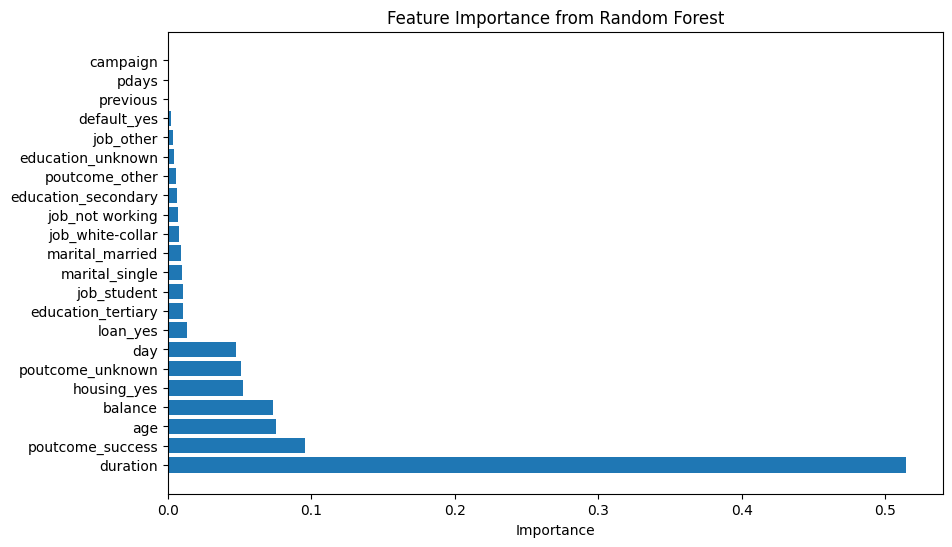

In [26]:
rf_best_model = grid_search_rf.best_estimator_

# Get feature importances
rf_feature_importances = rf_best_model.feature_importances_

# Create a DataFrame for visualization
rf_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

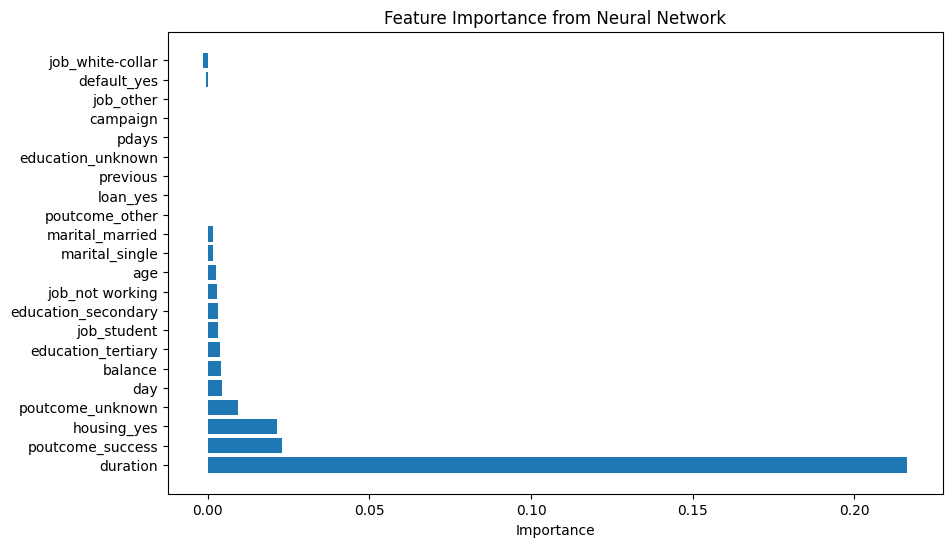

In [27]:
# Get the best model from GridSearchCV
best_nn_model = grid_search_nn.best_estimator_

# [7]: Calculate permutation importance
result_nn = permutation_importance(best_nn_model, X_test, y_test, n_repeats=30, random_state=42)

# Create a DataFrame for visualization
nn_feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result_nn.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(nn_feature_importance_df['Feature'], nn_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Neural Network')
plt.show()

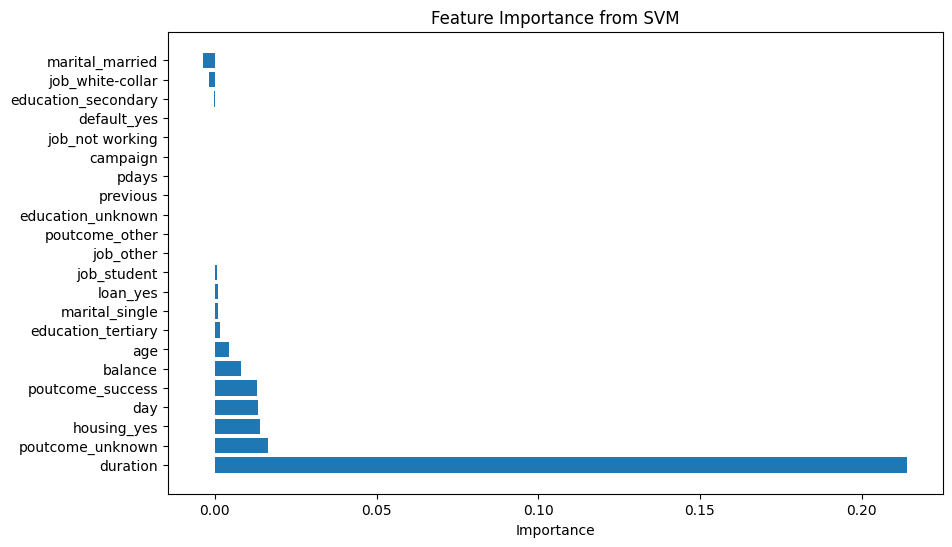

In [30]:
best_svm_model = grid_search_svm.best_estimator_

# [7]: Calculate permutation importance for SVM
result_svm = permutation_importance(best_svm_model, X_test, y_test, n_repeats=30, random_state=42)

# Create a DataFrame for visualization
svm_feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result_svm.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(svm_feature_importance_df['Feature'], svm_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from SVM')
plt.show()


In [28]:
df.tail()

,age,balance,day,duration,campaign,pdays,previous,job_not working,job_other,job_student,...,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
11157,-0.691015,-0.473616,20,257,-1.0,-1.0,-1.0,False,False,False,...,False,False,False,False,True,False,False,False,True,False
11158,-0.187357,-0.246658,16,83,-1.0,-1.0,-1.0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
11159,-0.774958,-0.464934,19,156,-1.0,-1.0,-1.0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
11160,0.148416,-0.473926,8,9,-1.0,-1.0,-1.0,False,False,False,...,True,False,False,False,False,True,False,False,False,False
11161,-0.607072,-0.473926,9,628,-1.0,-1.0,-1.0,False,False,False,...,True,False,False,False,False,False,False,False,True,False


## Recursive Feature Elimination

In [29]:

from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report

Optimal number of features: 11
Selected features: Index(['age', 'balance', 'day', 'duration', 'job_white-collar',
       'marital_married', 'education_tertiary', 'housing_yes', 'loan_yes',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')
              precision    recall  f1-score   support

       False       0.82      0.80      0.81      1175
        True       0.79      0.81      0.80      1058

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



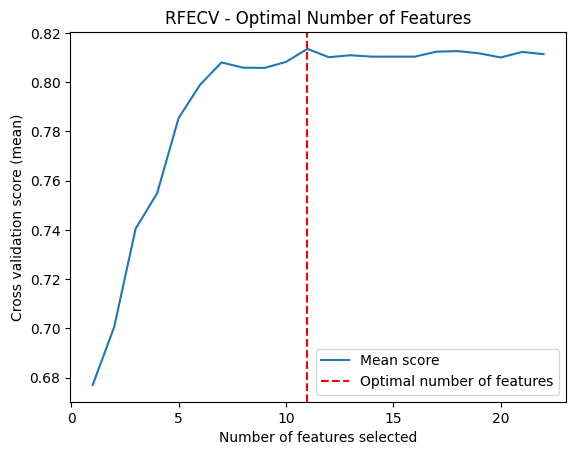

In [30]:
# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# [8]: Apply RFECV
rfecv = RFECV(estimator=classifier, step=1, cv=5, scoring='accuracy') 
rfecv.fit(X_train, y_train)

# Print the results
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Selected features: {X.columns[rfecv.support_]}")

# Evaluate the model with the selected features
y_pred = rfecv.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


plt.figure()
plt.title("RFECV - Optimal Number of Features")
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (mean)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], label='Mean score')
plt.axvline(x=rfecv.n_features_, linestyle='--', color='r', label='Optimal number of features')
plt.legend()
plt.show()

## Testing Models

In [57]:
nn_model.fit(X_train, y_train)

models = {
    "Random Forest": rfecv,
    "Neural Net": nn_model
    
}

# Evaluating each model
for model_name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate probabilities for ROC AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    
    print(f"--- {model_name} ---")
    print(classification_report(y_test, y_pred))
    
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("\n")

--- Random Forest ---
              precision    recall  f1-score   support

       False       0.82      0.80      0.81      1175
        True       0.79      0.81      0.80      1058

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

ROC AUC Score: 0.8800


--- Neural Net ---
              precision    recall  f1-score   support

       False       0.81      0.79      0.80      1175
        True       0.77      0.79      0.78      1058

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233

ROC AUC Score: 0.8742




## Pathological Testing

In [32]:
# Load the dataset
df = pd.read_csv('bank.csv')

# Group job categories into broader categories
job_grouping = {
    'management': 'white-collar',
    'technician': 'white-collar',
    'admin.': 'white-collar',
    'self-employed': 'white-collar',
    'blue-collar': 'blue-collar',
    'services': 'blue-collar',
    'retired': 'not working',
    'unemployed': 'not working',
    'housemaid': 'not working',
    'entrepreneur': 'other',
    'student': 'student',
    'unknown': 'other'
}

#  Apply the job grouping
df['job_grouped'] = df['job'].map(job_grouping)

# One-hot encode the 'job_grouped' column
job_dummies = pd.get_dummies(df['job_grouped'], prefix='job', drop_first=True)
df = pd.concat([df, job_dummies], axis=1)

# One-hot encode other categorical columns
categorical_columns = ['marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'deposit']
for col in categorical_columns:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat([df, dummies], axis=1)

# Drop the original columns, that are no longer needed
df = df.drop(columns=['job', 'job_grouped', 'contact'] + categorical_columns)


train_data_a = df[(df['month'] != 'jun') & (df['month'] != 'jul')]
test_data_a = df[(df['month'] == 'jun') | (df['month'] == 'jul')]

# Drop the month column after filtering
train_data_a = train_data_a.drop(columns=['month'])
test_data_a = test_data_a.drop(columns=['month'])

# Prepare features and target for the new train/test split
X_train_a = train_data_a.drop(['deposit_yes'], axis=1)  # Features
y_train_a = train_data_a['deposit_yes']                    # Target variable
X_test_a = test_data_a.drop(['deposit_yes'], axis=1)      # Features
y_test_a = test_data_a['deposit_yes']                        # Target variable

# Fit the model (example with RandomForestClassifier)
classifier_a = RandomForestClassifier(random_state=42)
classifier_a.fit(X_train_a, y_train_a)

# Predict on the test set
y_pred_a = classifier_a.predict(X_test_a)

# Print classification report
print("--- Model Performance for June and July Test ---")
print(classification_report(y_test_a, y_pred_a))

--- Model Performance for June and July Test ---
              precision    recall  f1-score   support

       False       0.87      0.81      0.84      1563
        True       0.76      0.83      0.80      1173

    accuracy                           0.82      2736
   macro avg       0.82      0.82      0.82      2736
weighted avg       0.82      0.82      0.82      2736



**Observation**: We see that the perfomance of the model degrades due to limiting the train data to not contain the `june` and `july` data.

In [45]:
# Load the dataset
df = pd.read_csv('bank.csv')

df = df.drop(columns=['month'])
# Group job categories into broader categories
job_grouping = {
    'management': 'white-collar',
    'technician': 'technician',  # Keep technician as a separate group
    'admin.': 'white-collar',
    'self-employed': 'white-collar',
    'blue-collar': 'blue-collar',
    'services': 'blue-collar',
    'retired': 'not working',
    'unemployed': 'not working',
    'housemaid': 'not working',
    'entrepreneur': 'other',
    'student': 'student',
    'unknown': 'other'
}

# Apply the job grouping
df['job_grouped'] = df['job'].map(job_grouping)

# One-hot encode the 'job_grouped' column
job_dummies = pd.get_dummies(df['job_grouped'], prefix='job', drop_first=True)
df = pd.concat([df, job_dummies], axis=1)

# One-hot encode other categorical columns
categorical_columns = ['marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'deposit']
for col in categorical_columns:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat([df, dummies], axis=1)

# Drop the original columns that are no longer needed
df = df.drop(columns=['job', 'job_grouped', 'contact'] + categorical_columns)

# Split the data: training on non-technician and testing on technician
train_data_b = df[df['job_technician'] == 0]  # All other professions
test_data_b = df[df['job_technician'] == 1]   # Only technicians

# Drop the target variable from train and test sets
X_train_b = train_data_b.drop(['deposit_yes'], axis=1)  # Features
y_train_b = train_data_b['deposit_yes']                    # Target variable
X_test_b = test_data_b.drop(['deposit_yes'], axis=1)      # Features
y_test_b = test_data_b['deposit_yes']                        # Target variable

# Fit the model (example with RandomForestClassifier)
classifier_b = RandomForestClassifier(random_state=42)
classifier_b.fit(X_train_b, y_train_b)

# Predict on the test set
y_pred_b = classifier_b.predict(X_test_b)

# Print classification report
print("--- Model Performance for Technician Test ---")
print(classification_report(y_test_b, y_pred_b))


--- Model Performance for Technician Test ---
              precision    recall  f1-score   support

       False       0.81      0.84      0.82       983
        True       0.80      0.76      0.78       840

    accuracy                           0.80      1823
   macro avg       0.80      0.80      0.80      1823
weighted avg       0.80      0.80      0.80      1823



In [43]:

df = pd.read_csv('bank.csv')

# Drop the month column
df = df.drop(columns=['month'])

# Group job categories into broader categories
job_grouping = {
    'management': 'white-collar',
    'technician': 'technician',  # Keep technician as a separate group
    'admin.': 'white-collar',
    'self-employed': 'white-collar',
    'blue-collar': 'blue-collar',
    'services': 'blue-collar',
    'retired': 'not working',
    'unemployed': 'not working',
    'housemaid': 'not working',
    'entrepreneur': 'other',
    'student': 'student',
    'unknown': 'other'
}

# Apply the job grouping
df['job_grouped'] = df['job'].map(job_grouping)

# One-hot encode the 'job_grouped' column
job_dummies = pd.get_dummies(df['job_grouped'], prefix='job', drop_first=True)
df = pd.concat([df, job_dummies], axis=1)

# One-hot encode other categorical columns
categorical_columns = ['marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'deposit']
for col in categorical_columns:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat([df, dummies], axis=1)

# Drop the original columns that are no longer needed
df = df.drop(columns=['job', 'job_grouped', 'contact'] + categorical_columns)

# Identify unique job categories for training (excluding technician)
job_categories = df.filter(like='job_').columns.tolist()

# Initialize variables to keep track of best performance
best_score = 0
best_job = None

# Loop through each job category
for job in job_categories:
    if job == 'job_technician':
        continue  # Skip the technician category for training

    # Split the data for the current job category
    train_data_c = df[df[job] == 1]  # Only the current job category
    test_data_c = df[df['job_technician'] == 1]  # Testing on technicians

    # Drop the target variable from train and test sets
    X_train_c = train_data_c.drop(['deposit_yes'], axis=1)  # Features
    y_train_c = train_data_c['deposit_yes']                    # Target variable
    X_test_c = test_data_c.drop(['deposit_yes'], axis=1)      # Features
    y_test_c = test_data_c['deposit_yes']                        # Target variable

    # Fit the model
    classifier_c = RandomForestClassifier(random_state=42)
    classifier_c.fit(X_train_c, y_train_c)

    # Predict on the test set
    y_pred_c = classifier_c.predict(X_test_c)

    # Print classification report
    print(f"--- Model Performance for {job} ---")
    report = classification_report(y_test_c, y_pred_c, output_dict=True)
    print(classification_report(y_test_c, y_pred_c))

    # Check F1 score for this job category

    # print(report)
    f1_score = report['weighted avg']['f1-score']  # Get F1 score for the positive class (deposit_yes)
    
    # Update the best score and job if current F1 score is higher
    if f1_score > best_score:
        best_score = f1_score
        best_job = job

# Print the best job category based on F1 score
print(f"The job category with the highest F1 score is '{best_job}' with a score of {best_score:.4f}.")

--- Model Performance for job_not working ---
              precision    recall  f1-score   support

       False       0.79      0.80      0.80       983
        True       0.77      0.75      0.76       840

    accuracy                           0.78      1823
   macro avg       0.78      0.78      0.78      1823
weighted avg       0.78      0.78      0.78      1823

--- Model Performance for job_other ---
              precision    recall  f1-score   support

       False       0.75      0.85      0.79       983
        True       0.79      0.66      0.72       840

    accuracy                           0.76      1823
   macro avg       0.77      0.76      0.76      1823
weighted avg       0.77      0.76      0.76      1823

--- Model Performance for job_student ---
              precision    recall  f1-score   support

       False       0.89      0.51      0.65       983
        True       0.62      0.93      0.74       840

    accuracy                           0.70      1823


**Observation**: We observe that the closest match to `technician` is a `white-collar` job. However, given the low feature importance of the job and the similarity in F1 scores, it is clear that a precise determination is challenging.




## References

1. ChatGPT Prompt: How to perform standardization and regularization on the columns of a dataframe.
2. ChatGPT Prompt: Do one hot incoding for the following columns on the df -  ['marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'deposit']
3. SVC - [Documentation](https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html)
4. ChatGPT Prompt: How to use GridSearchCV to find the reasonable hyper-parameter settings for SVM.
5. ChatGPT Prompt: How to use GridSearchCV to find the reasonable hyper-parameter settings for NN.
6. ChatGPT Prompt: How to use GridSearchCV to find the reasonable hyper-parameter settings for Random Forest.
7. ChatGPT Prompt: How to calculate feature importance for NN and SVM.
8. ChatGPT Prompt: How to Apply RFECV for Random Forest Classifier.
and various other ChatGPT prompts to rephrase the observation, mostly to remove and grammatical errors, etc.

 




